In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('../data/income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


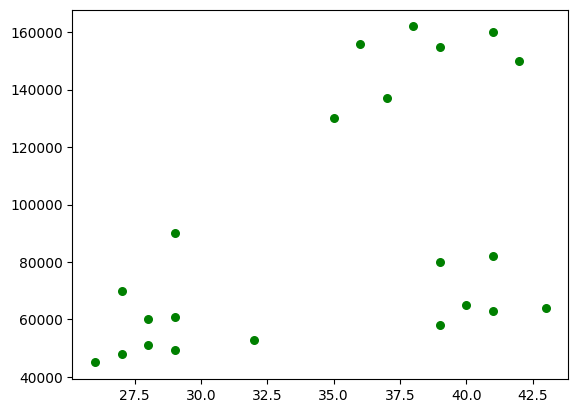

In [7]:
plt.scatter(df['Age'],df['Income($)'],c='green',s=30)

In [8]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [12]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [13]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


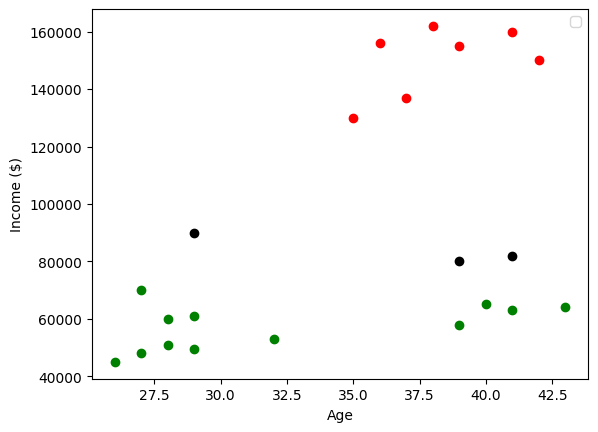

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'], color ='green')
plt.scatter(df2.Age,df2['Income($)'], color ='red')
plt.scatter(df3.Age,df3['Income($)'], color ='black')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [18]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [19]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [20]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [23]:
# centroids
cen = km.cluster_centers_

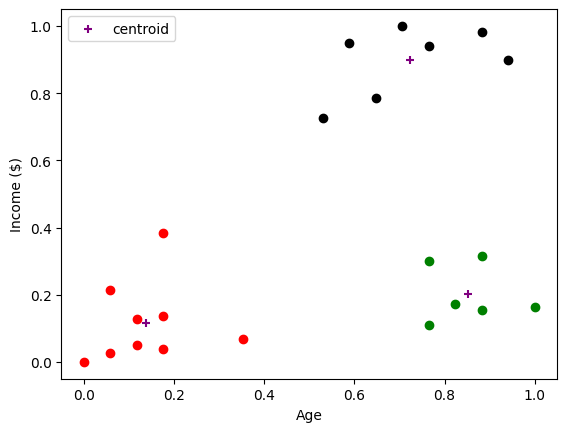

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'], color ='green')
plt.scatter(df2.Age,df2['Income($)'], color ='red')
plt.scatter(df3.Age,df3['Income($)'], color ='black')
plt.scatter(cen[:,0],cen[:,1],color='purple',label='centroid',s=30,marker='+')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [29]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [30]:
sse

[5.434011511988177,
 2.0911363886990766,
 0.4750783498553095,
 0.36877340764405897,
 0.297156426651739,
 0.22020960864009395,
 0.19429256406898146,
 0.14257076249690032,
 0.11514679223844346]

Text(0, 0.5, 'Sum of squared error')

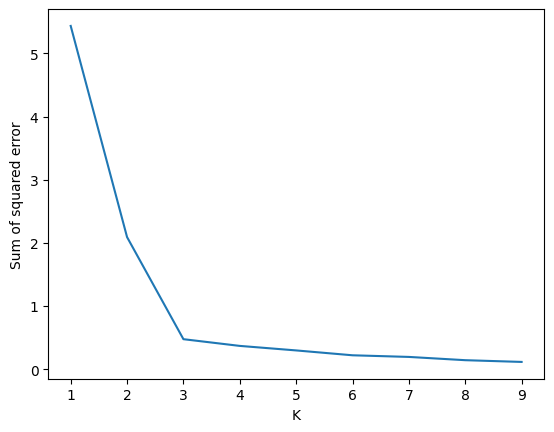

In [32]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
# take elbow value as k which is 3